**Task 1: Display the first 28 eigenfaces**

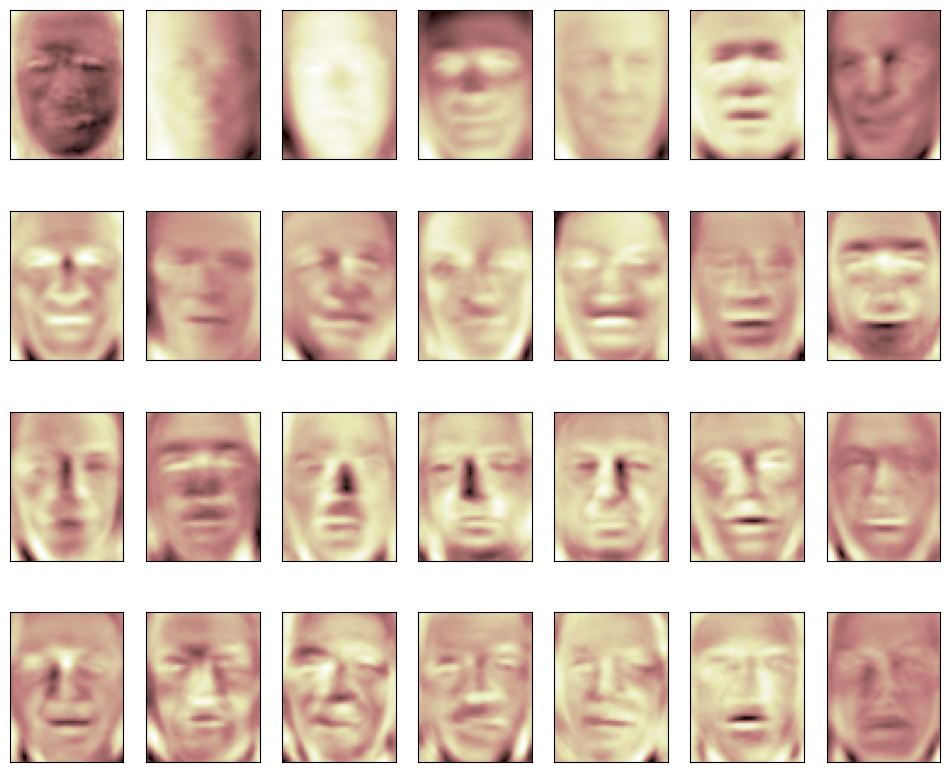

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

# Fetch the LFW dataset
faces = fetch_lfw_people(min_faces_per_person=60)

# Perform PCA to extract eigenfaces
pca = PCA(n_components=28)
pca.fit(faces.data)

# Display the first 28 eigenfaces
fig, ax = plt.subplots(4, 7, figsize=(12, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(pca.components_[i].reshape(62, 47), cmap='pink')
    axi.set(xticks=[], yticks=[])
plt.show()

**Task 2: Determine the least number of dimensions with a 5% relative error**

In [10]:
# Calculate the cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of dimensions to keep 95% of the variance
N = np.argmax(explained_variance >= 0.95) + 1
print("Number of dimensions to keep 95% of the variance:", N)

Number of dimensions to keep 95% of the variance: 1


**Task 3: Compute representations of the last seven images using N eigenfaces**

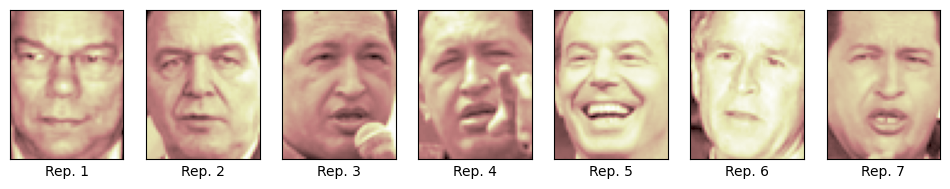

In [11]:
# Get the representations of the last seven images using N eigenfaces
last_seven_images = faces.data[-7:]
representations = pca.transform(last_seven_images)

# Visualize the representations
fig, ax = plt.subplots(1, 7, figsize=(12, 5))
for i, axi in enumerate(ax.flat):
    axi.imshow(last_seven_images[i].reshape(62, 47), cmap='pink')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(f"Rep. {i+1}")
plt.show()

**Task 4: Represent images of Ariel Sharon and Hugo Chavez in a three-dimensional space**

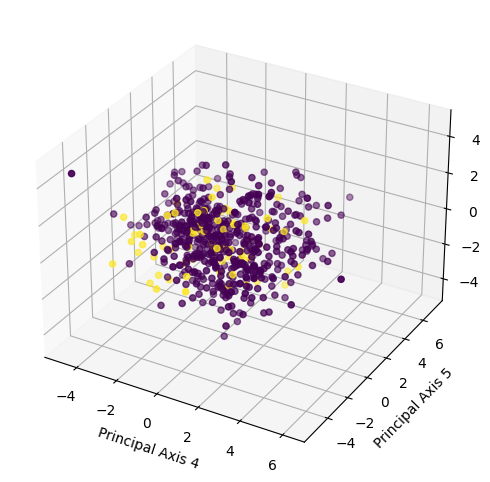

In [12]:
# Filter images of Ariel Sharon and Hugo Chavez
sharon_chavez_indices = [i for i, target in enumerate(faces.target) if target in [3, 5]]
sharon_chavez_data = faces.data[sharon_chavez_indices]

# Perform PCA on images of Ariel Sharon and Hugo Chavez
pca_3d = PCA(n_components=6)
pca_3d.fit(sharon_chavez_data)

# Transform data to a three-dimensional space
transformed_data = pca_3d.transform(sharon_chavez_data)

# Plot the data points in a three-dimensional space
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed_data[:, 3], transformed_data[:, 4], transformed_data[:, 5], c=faces.target[sharon_chavez_indices], cmap='viridis')
ax.set_xlabel('Principal Axis 4')
ax.set_ylabel('Principal Axis 5')
ax.set_zlabel('Principal Axis 6')
plt.show()